In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('laptops_10.csv', encoding='latin-1')

df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


Количество памяти:

Text(0.5, 1.0, 'Memory_count')

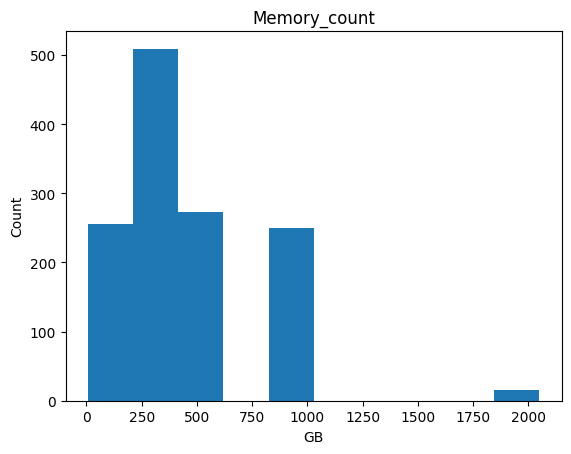

In [3]:
plt.hist(df['Memory_Amount'])
plt.xlabel('GB')
plt.ylabel('Count')
plt.title('Memory_count')

Стоимость ноутбуков:

Text(0.5, 1.0, 'Laptop_price')

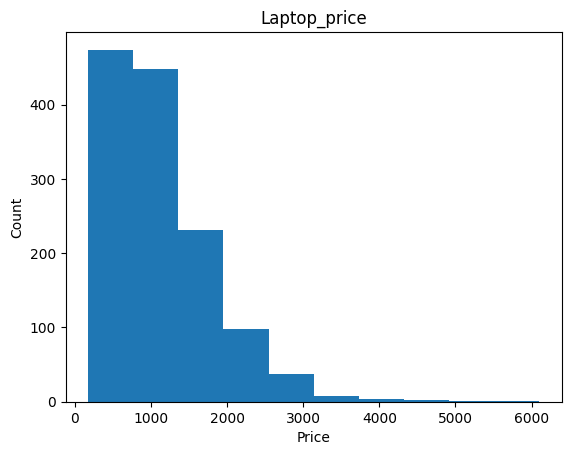

In [4]:
plt.hist(df['Price_euros'])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Laptop_price')

Вес ноутбуков:

Text(0.5, 1.0, 'Weight')

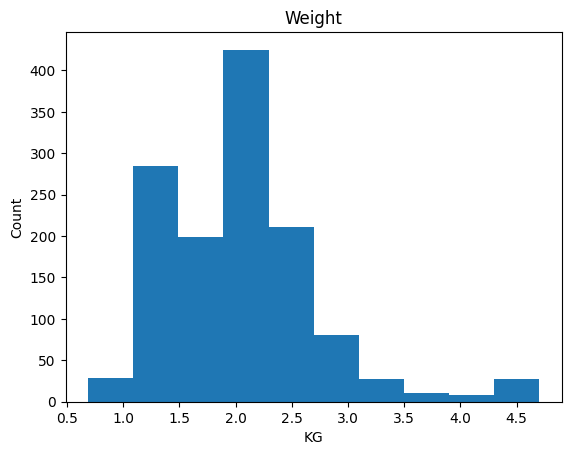

In [5]:
plt.hist(df['Weight'])
plt.xlabel('KG')
plt.ylabel('Count')
plt.title('Weight')

Распределение типов носителя:

In [9]:
data = df['Memory_Type'].value_counts()
data

Memory_Type
SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: count, dtype: int64

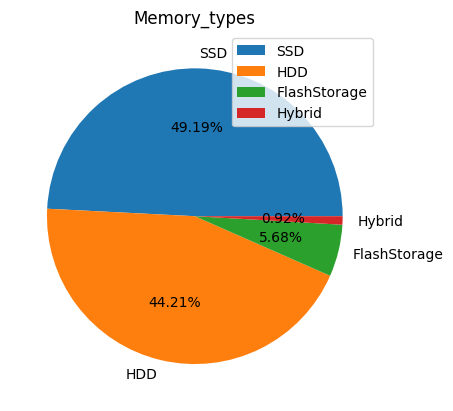

In [10]:
plt.pie(data.values, labels=data.index, autopct='%1.2f%%')
plt.legend(data.index)
plt.title('Memory_types');

Распределение компаний производителей:

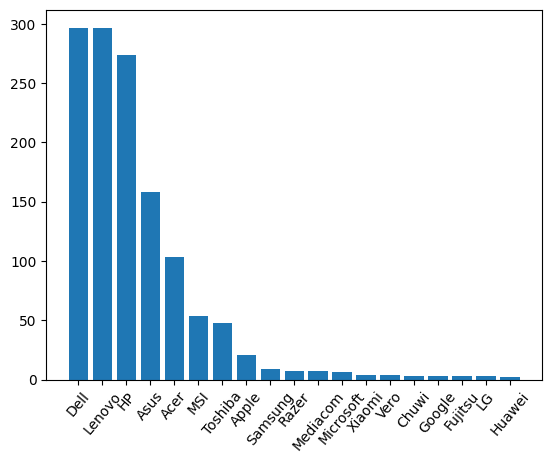

In [3]:
data = df['Company'].value_counts()
plt.bar(data.index, data.values)
plt.xticks(rotation=50);

Распределение операционной системы:

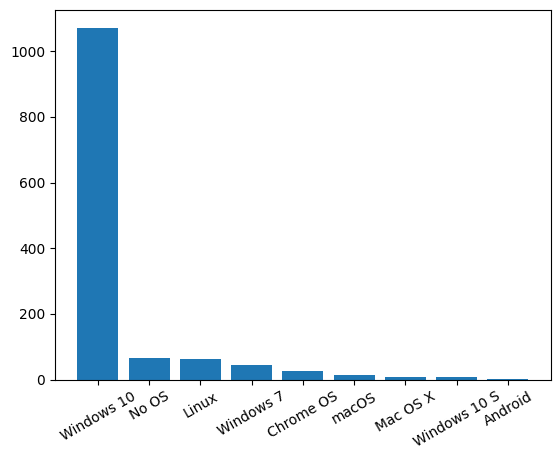

In [20]:
data = df['OpSys'].value_counts()
plt.bar(data.index, data.values)
plt.xticks(rotation=30);

Распределение компаний производителей ЦПУ:

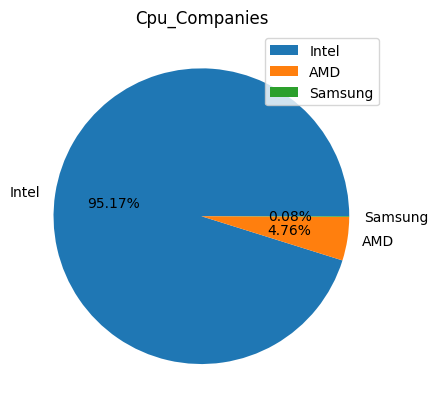

In [21]:
data = df['Cpu_Company'].value_counts()
plt.pie(data.values, labels=data.index, autopct='%1.2f%%')
plt.legend(data.index)
plt.title('Cpu_Companies');

Графики в относительных величинах

In [22]:
data = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'])
data = data.drop(columns=['Samsung']).reset_index()

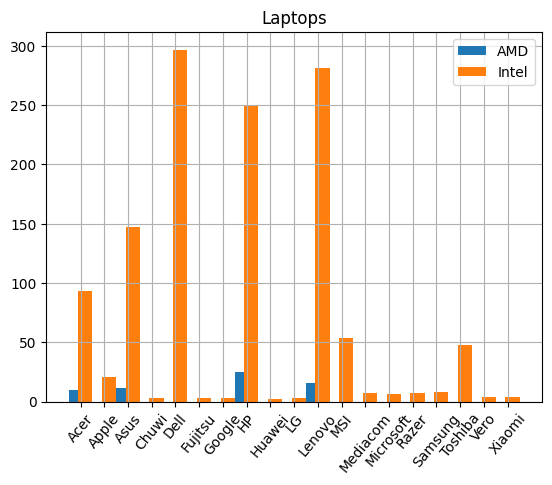

In [28]:
import numpy as np

n_ticks = np.arange(len(data))
plt.bar(n_ticks - 0.2, data['AMD'], width=0.6)
plt.bar(n_ticks + 0.2, data['Intel'], width=0.6)

plt.legend(['AMD', 'Intel'])
plt.title('Laptops')
plt.grid()
plt.xticks(n_ticks, data['Company'], rotation=50);

Графики в абсолютных величинах

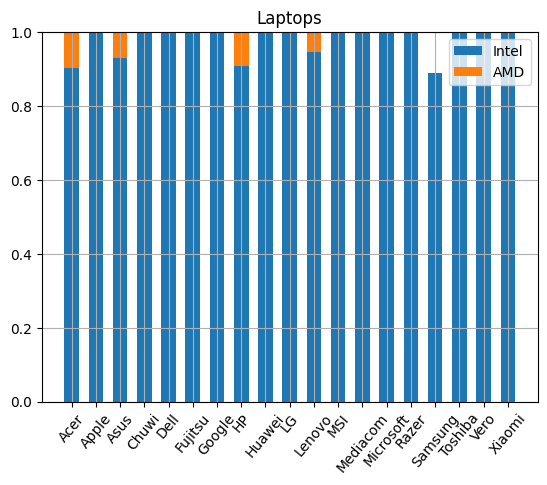

In [31]:
data = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'], normalize='index')
data = data.drop(columns=['Samsung']).reset_index()

plt.bar(data['Company'], data['Intel'], width=0.6)
plt.bar(data['Company'], data['AMD'], width=0.6, bottom=data['Intel'])

plt.legend(['Intel', 'AMD'])
plt.title('Laptops')
plt.grid()
plt.xticks(n_ticks, data['Company'], rotation=50);

Взаимосвязь стоимости ноутбука и компании производиетеля процессора

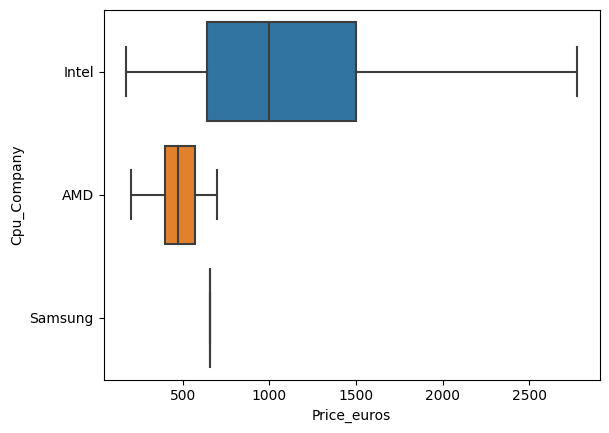

In [35]:
import seaborn as sns

sns.boxplot(x=df['Price_euros'], y=df['Cpu_Company'], showfliers=False);

Взаимосвязь стоимости ноутбука и типа носителя памяти

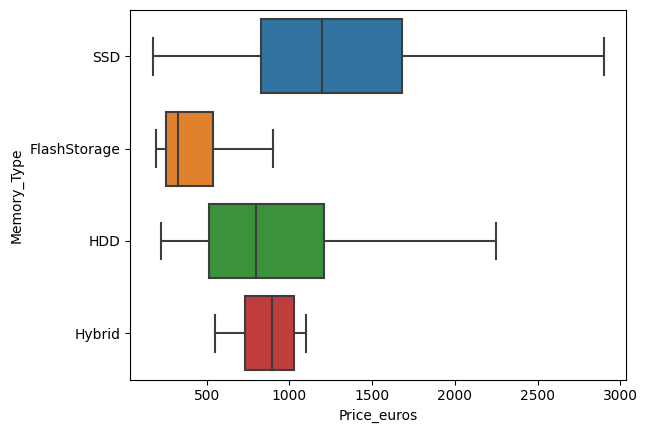

In [36]:
sns.boxplot(x=df['Price_euros'], y=df['Memory_Type'], showfliers=False);

Взаимосвязь стоимости ноутбука и количества оперативной памяти

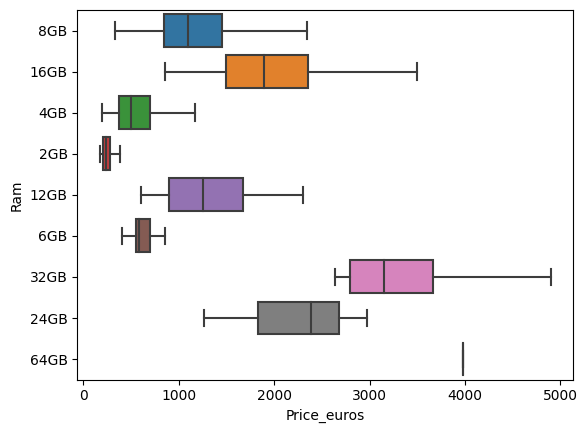

In [41]:
sns.boxplot(x=df['Price_euros'], y=df['Ram'], showfliers=False);

Взаимосвязь стоимости ноутбука и компании производиетеля

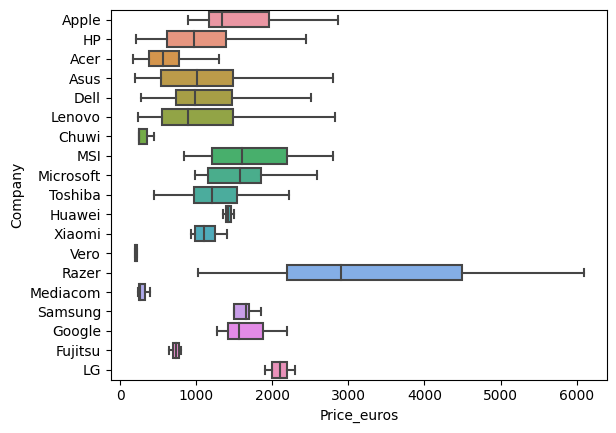

In [42]:
sns.boxplot(x=df['Price_euros'], y=df['Company'], showfliers=False);

Матрица корреляции

In [3]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix

ValueError: could not convert string to float: 'Apple'

In [53]:
sns.heatmap(corr_matrix, annot=True, linewidths=5, cmap='coolwarm')

NameError: name 'corr_matrix' is not defined